In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df =df.drop(df[df["Group"]=="Converted"].index)
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [5]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Group'].values)
df.iloc[:, 0] = y
y = class_le.fit_transform(df['M/F'].values)
df.iloc[:, 1] = y

df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,0,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,0,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
print('Class label distribution: %s' %np.bincount(y_train)[1:])

Class label distribution: [133]


In [8]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [11]:
#df = df.dropna('')

In [12]:
df = df.dropna(axis = 0)
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,1,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,0,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,0,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,1,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [13]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

### Logistic Regression: Combining transformers and estimators in a pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.990


### K-fold cross-validation

In [28]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
    

Fold  1, Class dist.: [ 80 118], Acc: 1.000
Fold  2, Class dist.: [ 81 118], Acc: 1.000
Fold  3, Class dist.: [ 80 119], Acc: 1.000
Fold  4, Class dist.: [ 80 119], Acc: 1.000
Fold  5, Class dist.: [ 80 119], Acc: 1.000
Fold  6, Class dist.: [ 80 119], Acc: 1.000
Fold  7, Class dist.: [ 80 119], Acc: 1.000
Fold  8, Class dist.: [ 80 119], Acc: 0.955
Fold  9, Class dist.: [ 80 119], Acc: 1.000
Fold 10, Class dist.: [ 80 119], Acc: 1.000


In [16]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.995 +/- 0.014


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv=10, n_jobs=1)

print('CV accuracy scores: %s' %scores)

CV accuracy scores: [1.         1.         1.         1.         1.         1.
 1.         0.95454545 1.         1.        ]


### Tuning hyperparameters via grid search

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9954545454545455
{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [19]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.990


In [20]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[38  0]
 [ 1 57]]


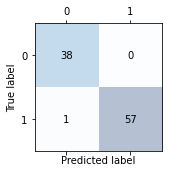

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

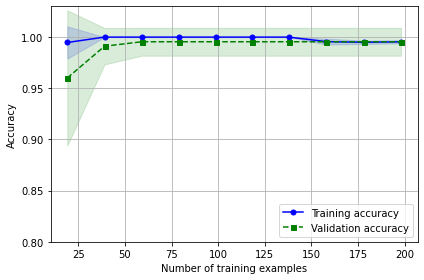

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

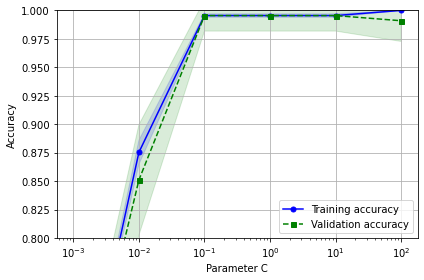

In [23]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

### The Group Implementation

In [24]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
X_test, X_valid, y_test, y_valid = train_test_split(X_remaining, y_remaining, test_size = 0.5, random_state = 0, stratify = y_remaining)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Random Forest Feature Selection

 1 CDR                            0.668619
 2 MMSE                           0.189568
 3 nWBV                           0.046163
 4 eTIV                           0.022264
 5 EDUC                           0.019964
 6 ASF                            0.018921
 7 Age                            0.017019
 8 SES                            0.009935
 9 M/F                            0.007546


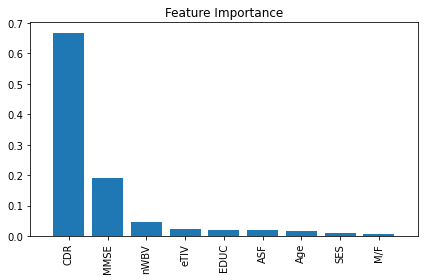

In [26]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim ([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))


Test Accuracy: 1.000
